In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
rides_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_rides_df = pd.merge(rides_df, city_df)
# Display the data table for preview
city_rides_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

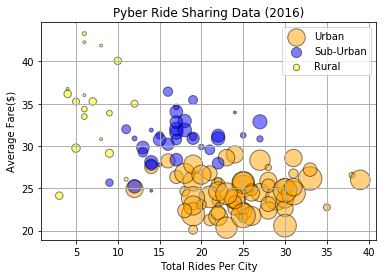

In [2]:
# Obtain the x and y coordinates for each of the three city types
rides_and_fares_df = city_rides_df.groupby(["city", "type"]).agg({"fare":["count", "mean", "sum"], "driver_count":"first"}).reset_index()
rides_and_fares_df.columns = ["City", "Type", "Rides", "Average Fare", "Tot Fare", "Drivers"]


# Build the scatter plots for each city types
urban_df = rides_and_fares_df[rides_and_fares_df["Type"]=="Urban"]
suburban_df = rides_and_fares_df[rides_and_fares_df["Type"]=="Suburban"]
rural_df = rides_and_fares_df[rides_and_fares_df["Type"]=="Rural"]

# Incorporate the other graph properties
ax1 = plt.scatter(urban_df["Rides"], urban_df["Average Fare"], s=urban_df["Drivers"]*8, c="Orange", edgecolor="Black")
ax2 = plt.scatter(suburban_df["Rides"], suburban_df["Average Fare"], s=suburban_df["Drivers"]*8, c="Blue", edgecolor="Black")
ax3 = plt.scatter(rural_df["Rides"], rural_df["Average Fare"], s=rural_df["Drivers"]*8, c="Yellow", edgecolor="Black")
ax1.set_alpha(0.5)
ax2.set_alpha(0.5)
ax3.set_alpha(0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides Per City")
plt.ylabel("Average Fare($)")
plt.legend([ax1, ax2, ax3], ["Urban", "Sub-Urban", "Rural"])
plt.grid( linestyle='-', linewidth=1)

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


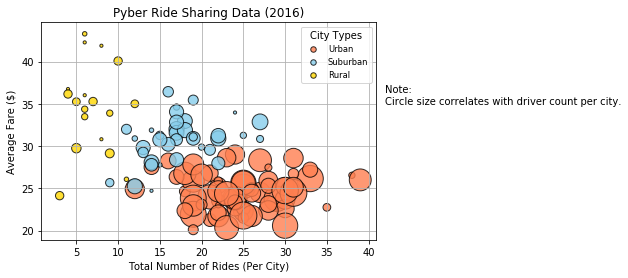

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

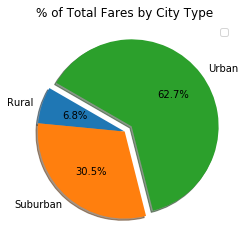

In [3]:
# Calculate Type Percents
type_percent_df = rides_and_fares_df.groupby("Type").agg({"Tot Fare":"sum"})
explode = [0, 0, 0.1]

# Build Pie Chart

type_percent_df.plot.pie(x="Type", y="Tot Fare", explode=explode, shadow=True, startangle=150, autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")
plt.ylabel("")
plt.legend("")

# Save Figure
plt.savefig("Fares by City Type.png")

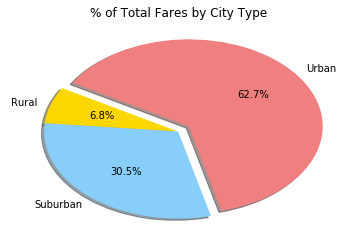

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

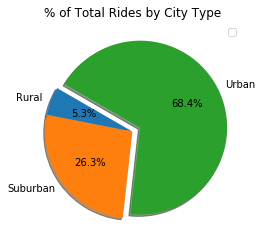

In [4]:
# Calculate Ride Percents
ride_percent_df = rides_and_fares_df.groupby("Type").agg({"Rides":"sum"})
explode = [0, 0, 0.1]


# Build Pie Chart
ride_percent_df.plot.pie(x="Type", y="Rides", explode=explode, shadow=True, startangle=150, autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")
plt.ylabel("")
plt.legend("")

# Save Figure
plt.savefig("Rides by City Type.png")


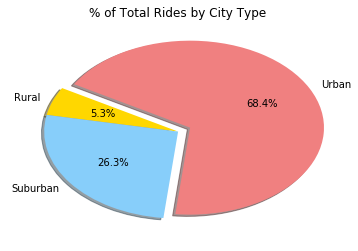

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

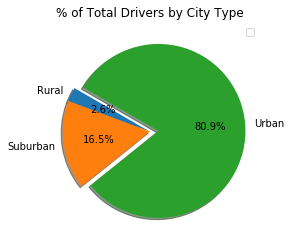

In [5]:
# Calculate Driver Percents
driver_percent_df = rides_and_fares_df.groupby("Type").agg({"Drivers":"sum"})
explode = [0, 0, 0.1]

# Build Pie Charts
driver_percent_df.plot.pie(x="Type", y="Drivers", explode=explode, shadow=True, startangle=150, autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")
plt.ylabel("")
plt.legend("")

# Save Figure
plt.savefig("Drivers by City Type.png")


In [6]:
# Show Figure
plt.show()